<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 30.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [2]:
import preliz as pz


# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

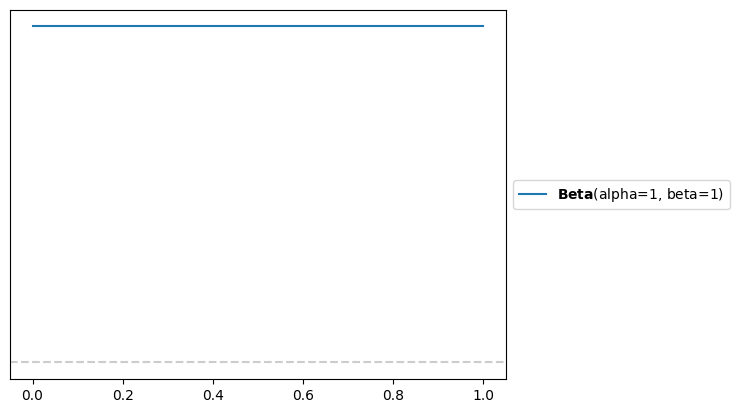

In [3]:
pz.Beta(alpha=1,beta=1).plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [4]:
pz.Beta(alpha=1,beta=1).moments()

[0.5, 0.08333333333333333, array(0.), -1.2]

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

Largest mean: Beta(96.0, 42.0)
Smallest mean: Beta(1.0, 2.0)
Largest variance: Beta(0.8, 0.9)
Smallest variance: Beta(500.0, 500.0)
Largest skew: Beta(1.0, 2.0)
Smallest skew: Beta(2.0, 1.0)
Largest kurtosis: Beta(500.0, 500.0)
Smallest kurtosis: Beta(0.8, 0.9)


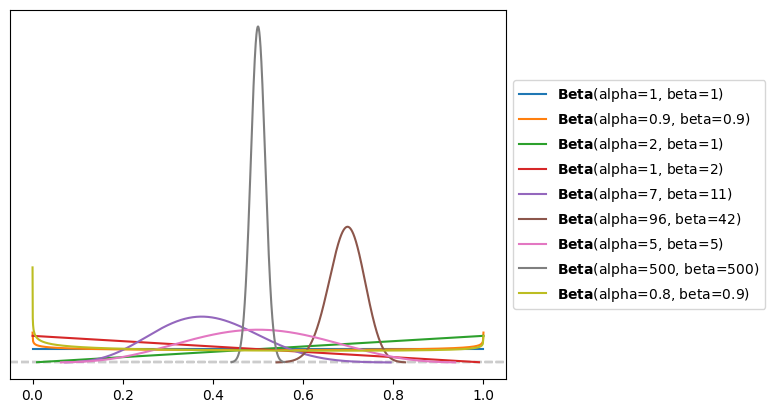

In [5]:
beta_dists = [
    pz.Beta(alpha=1, beta=1),
    pz.Beta(alpha=0.9, beta=0.9),
    pz.Beta(alpha=2, beta=1),
    pz.Beta(alpha=1, beta=2),
    pz.Beta(alpha=7, beta=11),
    pz.Beta(alpha=96, beta=42),
    pz.Beta(alpha=5, beta=5),
    pz.Beta(alpha=500, beta=500),
    pz.Beta(alpha=0.8, beta=0.9)
]

for i, dist in enumerate(beta_dists):
    dist.plot_pdf()
    moments = dist.moments()

means = [dist.moments()[0] for dist in beta_dists]
variances = [dist.moments()[1] for dist in beta_dists]
skews = [dist.moments()[2] for dist in beta_dists]
kurtoses = [dist.moments()[3] for dist in beta_dists]

largest_mean_idx = means.index(max(means))
smallest_mean_idx = means.index(min(means))
largest_variance_idx = variances.index(max(variances))
smallest_variance_idx = variances.index(min(variances))
largest_skew_idx = skews.index(max(skews))
smallest_skew_idx = skews.index(min(skews))
largest_kurtosis_idx = kurtoses.index(max(kurtoses))
smallest_kurtosis_idx = kurtoses.index(min(kurtoses))

print(f"Largest mean: Beta({beta_dists[largest_mean_idx].alpha}, {beta_dists[largest_mean_idx].beta})")
print(f"Smallest mean: Beta({beta_dists[smallest_mean_idx].alpha}, {beta_dists[smallest_mean_idx].beta})")
print(f"Largest variance: Beta({beta_dists[largest_variance_idx].alpha}, {beta_dists[largest_variance_idx].beta})")
print(f"Smallest variance: Beta({beta_dists[smallest_variance_idx].alpha}, {beta_dists[smallest_variance_idx].beta})")
print(f"Largest skew: Beta({beta_dists[largest_skew_idx].alpha}, {beta_dists[largest_skew_idx].beta})")
print(f"Smallest skew: Beta({beta_dists[smallest_skew_idx].alpha}, {beta_dists[smallest_skew_idx].beta})")
print(f"Largest kurtosis: Beta({beta_dists[largest_kurtosis_idx].alpha}, {beta_dists[largest_kurtosis_idx].beta})")
print(f"Smallest kurtosis: Beta({beta_dists[smallest_kurtosis_idx].alpha}, {beta_dists[smallest_kurtosis_idx].beta})")


###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


<Axes: >

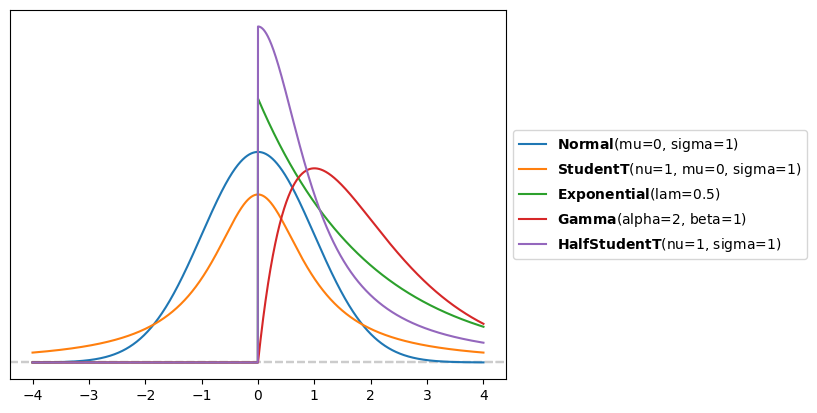

In [6]:
pz.Normal(mu=0, sigma=1).plot_pdf(support=(-4, 4))
pz.StudentT(nu=1, mu=0, sigma=1).plot_pdf(support=(-4, 4))
pz.Exponential(lam=1/2).plot_pdf(support=(-4, 4))
pz.Gamma(alpha=2, beta=1).plot_pdf(support=(-4, 4))
pz.HalfStudentT(nu=1, sigma=1).plot_pdf(support=(-4, 4))

**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

Exponenital, Gamma, HalfSutdentT, and HalfNormal support only x > 0, but Normal and T distribution support x ∈ **R**

**Task6**:

Can a distribution with support $[0,∞]$ have negative (or left) skew? If so, plot that specific distribution.

Yes! The Weibull distribution does this

[0.9181687423997607,
 0.04422997798311756,
 -0.25410960370675184,
 -0.11970993621849857]

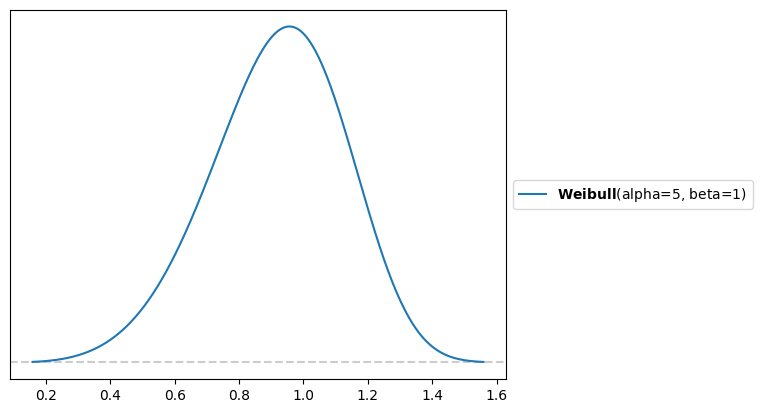

In [14]:
pz.Weibull(alpha=5, beta=1).plot_pdf()
pz.Weibull(alpha=5, beta=1).moments()

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

The Normal Distribution!

[0.0, 1.0, 0, 0]

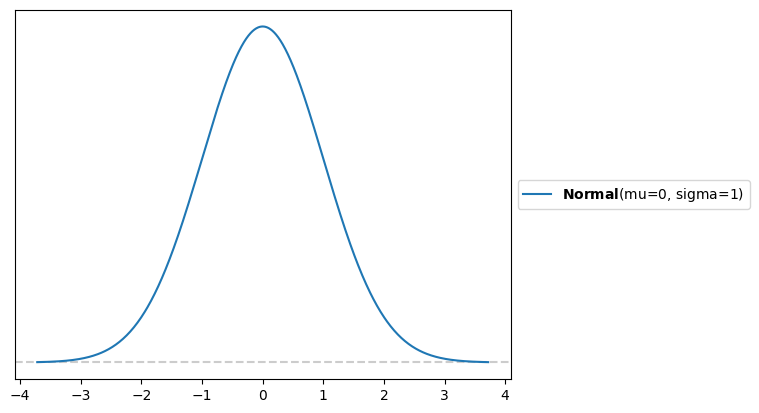

In [8]:
dist = pz.Normal(mu=0, sigma=1)
dist.plot_pdf()
dist.moments()

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

The skew notmal distribution

[-0.5641895835477563,
 0.6816901138162094,
 -0.13694876731165254,
 0.0617443154193264]

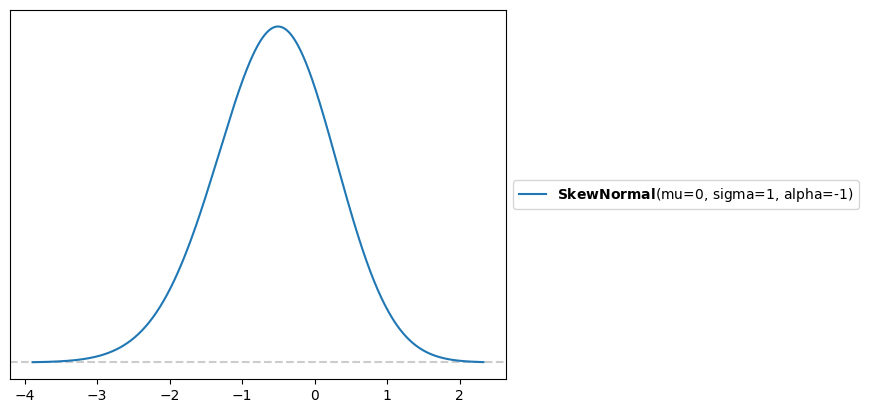

In [9]:
pz.SkewNormal(mu=0, sigma=1, alpha=-1).plot_pdf()
pz.SkewNormal(mu=0, sigma=1, alpha=-1).moments()

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

<Axes: >

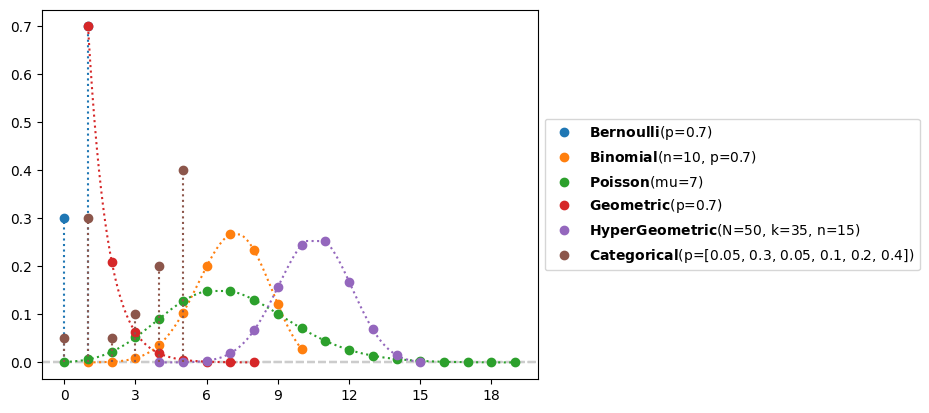

In [10]:
pz.Bernoulli(p=0.7).plot_pdf()
pz.Bernoulli(p=0.7).moments()

pz.Binomial(n=10, p=0.7).plot_pdf()
pz.Binomial(n=10, p=0.7).moments()

pz.Poisson(mu=7).plot_pdf()
pz.Poisson(mu=7).moments()

pz.Geometric(p=0.7).plot_pdf()
pz.Geometric(p=0.7).moments()

pz.HyperGeometric(N=50, k=35, n=15).plot_pdf()
pz.HyperGeometric(N=50, k=35, n=15).moments()

pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4]).plot_pdf()

In [11]:
print(pz.Bernoulli(p=0.7).moments())
print(pz.Binomial(n=10, p=0.7).moments())
print(pz.Poisson(mu=7).moments())
print(pz.Geometric(p=0.7).moments())
print(pz.HyperGeometric(N=50, k=35, n=15).moments())

[0.7, 0.21000000000000002, -0.8728715609439692, -1.238095238095238]
[7.0, 2.1000000000000005, -0.27602622373694163, -0.12380952380952379]
[7.0, 7.0, 0.3779644730092272, 0.14285714285714285]
[1.4285714285714286, 0.6122448979591838, 2.3734644158557194, 7.633333333333333]
[10.5, 2.25, -0.1111111111111111, -0.08983451536643026]


**Task10**:

Describe what processes "generate" each of the previous discrete distributions models. Also report their support.

Here's a spicier way to phrase the question: describe these distributions' maximum entropy conditions in english.

Hint: Make sure to read any of the: preliZ documentation, relevant wikipedia articles, or wolfram alpha.


Bernoulli models the the success or failure of a single trial (yes or no situation) Support {0,1}.

Bionomial models the probability of a certain number of successes in a fixed number of trials, assuming the trials have the same likelihood. Support {0, 1, 2, 3, ..., # of trials}.

Poisson models the probability of some number of events occuring in a fixed interval of space or time. Support {0, 1 , 2 , ...}.

Geometric: Gives the probability of a given number of trials required to get the first success in a series of bernoulli trials. Support {1, 2, 3, ... }

Hypergeometric: Gives the number of successes from sampling without replacement from a population of successes ad failures. Support {max(0, n+k-N), ..., min(k, n)} where N is the population size, k is the number of successes in the population, and n is the size of the sample.

Categorical Distribution: Models a single trial with more than 2 outcomes that each have a specific probability (the some of which is 1). Support {1, 2, ..., k} where k is the number of categories (possible outcomes).